<a href="https://colab.research.google.com/github/davidofitaly/06_classification_projects/blob/main/01_logistic_regression/02_wine_batasets_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Data description](#2)
4. [Create a copy data](#3)
5. [Data mining and precprocessing](#4)
6. [Correlation](#5)
7. [Division of data into training data and test collection](#6)
8. [Data standarization](#7)
9. [Logistic regression](#8)
10. [Model-based prediction](#9)
11. [Model-evaluation](#10)
12. [ROC AUC](#11)


### <a name='0'> </a> Import of libraries

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import sklearn
from plotly.subplots import make_subplots

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter= dict(float=lambda x: f'{x:.2f}'))

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.2.2
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


### <a name='1'> </a> Data loading

In [ ]:
# Import load_wine datasets
from sklearn.datasets import load_wine

# Load load_breast_cancer
wine_data = load_wine()

In [ ]:
# Display of collection keys
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# Create DataFrame and add target
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### <a name='2'> </a> Data description

### Features:

1. **alcohol**: The alcohol content in the wine (in % volume).
2. **malic acid**: The amount of malic acid in the wine, which affects its acidity and taste.
3. **ash**: The ash content in the wine, a measure of the wine's mineral content.
4. **alcalinity of ash**: The alkalinity of the ash, expressed as the relative amount of alkali (in g/l).
5. **magnesium**: The magnesium content in the wine sample (in mg/l).
6. **total phenols**: The total phenolic content in the wine, influencing its taste and structure.
7. **flavanoids**: The amount of flavonoids, a type of phenolic compound that contributes to the wine's bitterness and antioxidant properties.
8. **nonflavanoid phenols**: The amount of non-flavonoid phenols, which influence the wine's taste to a lesser extent than flavonoids.
9. **proanthocyanins**: The amount of proanthocyanins, which affect the wine's color and antioxidant properties.
10. **color intensity**: The intensity of the wine’s color, a measure of the depth of its hue.
11. **hue**: The shade or hue of the wine’s color, related to its quality and age.
12. **OD280/OD315 of diluted wines**: The ratio of absorbance at 280 nm and 315 nm, which measures the phenolic content.
13. **proline**: The proline content, an amino acid linked to the wine's quality.

### Target: Wine Class
- **target**: Indicates the wine category:
  - `0`: Wine type (Class 0)
  - `1`: Wine type (Class 1)
  - `2`: Wine type (Class 2)

Each wine sample is classified into one of three categories (wine types), based on the chemical properties listed above.


### <a name='3'> </a> Create a copy data

In [ ]:
# Create a copy of the DataFrame
df = wine_df.copy()

# Display DataFrame information (columns, data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### <a name='4'> </a> Data mining and precprocessing

- Duplicates

In [ ]:
# Show rows that are duplicates
df[df.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


- Missing values

In [ ]:
# Count the number of missing (null) values in each column
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


- Describe data

In [ ]:
# Show summary statistics, transposed for better readability
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


- Data distribution

target
1    71
0    59
2    48
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


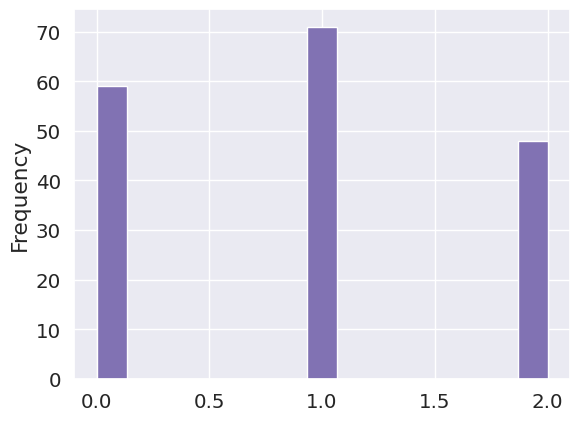

In [ ]:
print(df['target'].value_counts())
print(df.target.plot(kind='hist', bins=15, color='m'))

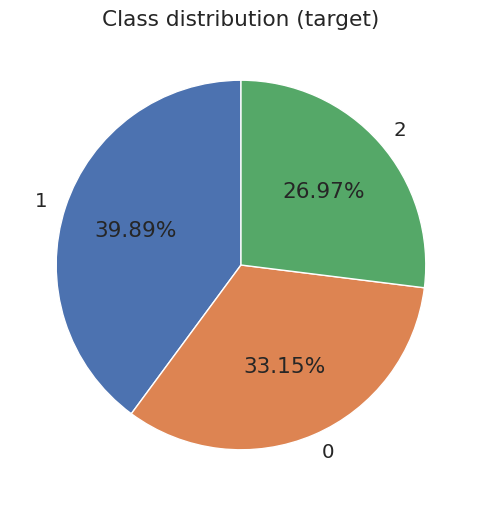

In [ ]:
target_counts = df['target'].value_counts()

# Create a plot-pie
plt.figure(figsize=(8, 6))
target_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Class distribution (target)')
plt.ylabel('')
plt.show()

alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64
Axes(0.125,0.11;0.775x0.77)


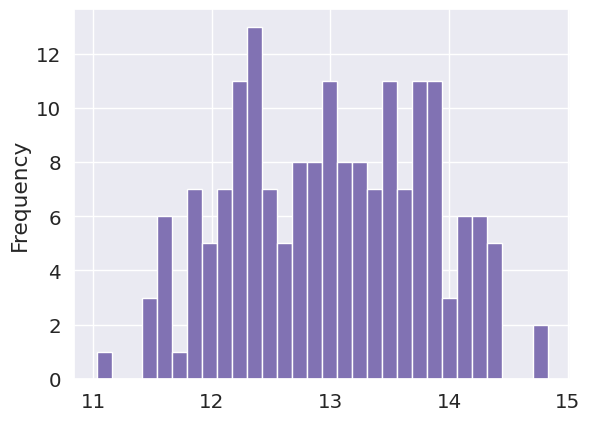

In [ ]:
print(df['alcohol'].value_counts())
print(df['alcohol'].plot(kind='hist', bins=30, color='m'))

flavanoids
2.65    4
2.03    3
2.68    3
0.60    3
1.25    3
       ..
2.78    1
2.90    1
3.74    1
3.27    1
0.69    1
Name: count, Length: 132, dtype: int64
Axes(0.125,0.11;0.775x0.77)


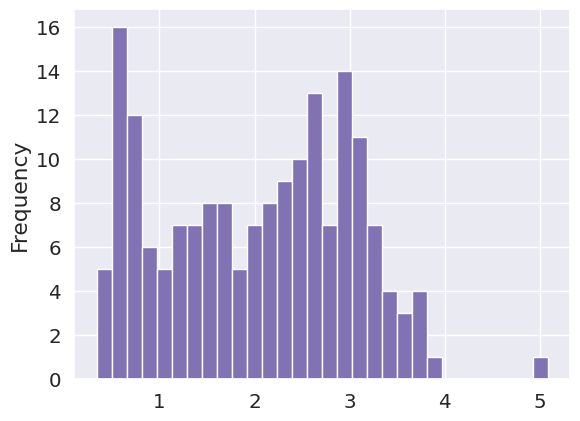

In [ ]:
print(df['flavanoids'].value_counts())
print(df['flavanoids'].plot(kind='hist', bins=30, color='m'))

color_intensity
2.60    4
4.60    4
3.80    4
3.40    3
5.00    3
       ..
6.30    1
7.05    1
7.20    1
8.90    1
9.20    1
Name: count, Length: 132, dtype: int64
Axes(0.125,0.11;0.775x0.77)


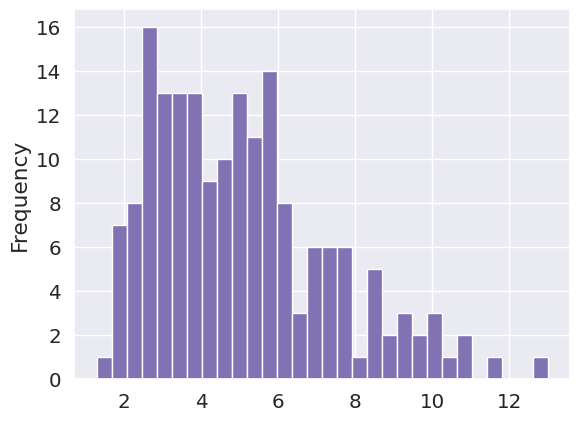

In [ ]:
print(df['color_intensity'].value_counts())
print(df['color_intensity'].plot(kind='hist', bins=30, color='m'))

### <a name='5'> </a> Correlation

In [ ]:
# Calculate the correlation matrix for the DataFrame
corr = df.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Text(0.5, 1.0, 'Correlation Heatmap')

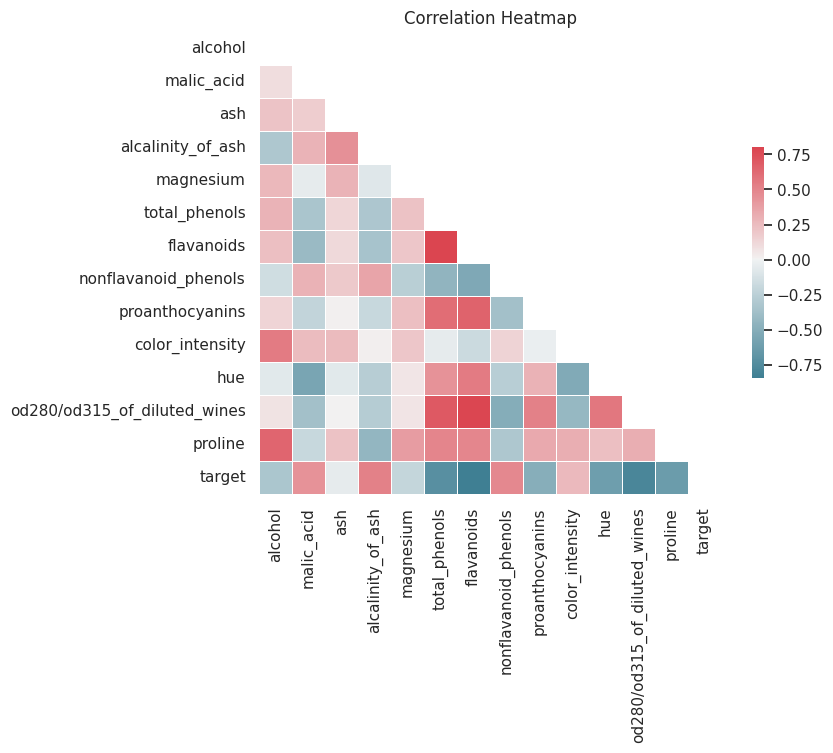

In [ ]:
sns.set(style="white")  # Set the style for seaborn plots to 'white'
mask = np.zeros_like(corr, dtype=bool)  # Create a mask for the upper triangle of the correlation matrix
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6)) # Create fiure and axis with specified size
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Create a diverging color palette
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw a heatmap with the correlation matrix
plt.title('Correlation Heatmap') # Set the title of the heatmap

In [ ]:
# Calculate and sort the correlation of all features in descending order
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
alcalinity_of_ash,0.517859
nonflavanoid_phenols,0.489109
malic_acid,0.437776
color_intensity,0.265668
ash,-0.049643
magnesium,-0.209179
alcohol,-0.328222
proanthocyanins,-0.499130
hue,-0.617369


<Axes: >

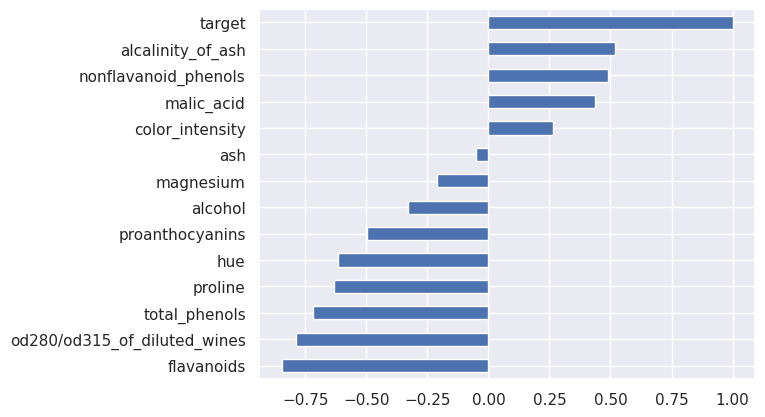

In [ ]:
sns.set()
# Calculate the correlation of all features with 'Price', sort them, and plot as a horizontal bar chart
df.corr()['target'].sort_values().plot(kind='barh')

In [ ]:
# Create a copy of the DataFrame
data = df.copy()

# Remove the 'Price' column from data and store it as the target variable
target = data.pop('target')

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Display the first 5 rows of the target variable (Price)
target.head()

,target
0,0
1,0
2,0
3,0
4,0


### <a name='6'> </a> Division of data into training data and test collection

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

# Print the shape of each set to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (124, 13)
X_test shape: (54, 13)
y_train shape: (124,)
y_test shape: (54,)


### <a name='7'> </a> Data standarization

In [ ]:
# Import the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.41, -1.26, -0.45, -0.45, -0.01, -0.16, -0.11, -0.45, -0.24, -1.09, 1.17, 0.73, -0.93],
       [0.31, 1.60, -0.37, 0.13, 1.50, -1.17, -1.32, 0.64, -0.44, 2.34, -1.60, -1.50, 0.27],
       [0.82, 0.72, 0.70, 0.13, 0.57, -0.77, -1.45, 1.23, -1.44, 0.38, 0.00, -1.13, -0.21],
       [2.10, -0.61, 0.12, -2.36, -0.59, 1.33, 1.59, 0.64, 2.24, 0.17, 1.26, 0.13, 1.25],
       [0.60, -0.55, 1.12, -0.16, 0.78, 0.09, 0.46, -0.54, -0.09, -0.38, 0.61, 0.33, 1.08],
       [-1.18, 1.62, 0.08, 0.71, -1.38, -0.33, -0.30, 0.56, -0.44, -1.10, -0.73, -0.09, -0.52],
       [-1.38, 1.63, 0.12, 0.42, -1.24, 0.93, 0.95, -1.21, 2.42, -1.01, -0.91, 1.40, -1.14],
       [-1.03, -0.71, -0.18, 0.94, -0.66, -0.86, -0.35, 0.64, -0.05, -1.17, 1.60, -0.52, -0.79],
       [-0.10, 1.19, 1.12, -0.27, 0.21, 0.19, 0.34, -0.87, 0.72, -0.24, 0.30, 1.24, 0.07],
       [0.37, 0.70, 0.08, 0.57, -0.52, -0.61, -1.26, 0.81, -0.62, 1.53, -1.77, -1.41, -0.31],
       ...,
       [-0.72, 0.10, -0.34, 0.71, -0.66, -1.02, -0.2

In [ ]:
scaler.mean_

array([13.01, 2.43, 2.36, 19.54, 99.15, 2.30, 2.05, 0.35, 1.59, 5.03, 0.96, 2.63, 748.27])

In [ ]:
scaler.scale_

array([0.83, 1.15, 0.26, 3.45, 13.88, 0.60, 1.03, 0.12, 0.55, 2.21, 0.23, 0.72, 321.74])

### <a name='8'> </a> Logistic regression

In [ ]:
# Import LogisticRegression class form sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LinearRegression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

### <a name='9'> </a> Model-based Prediction

In [ ]:
y_true = y_test.copy()
y_pred = log_reg.predict(X_test)

# Create a DataFrame with true and predicted values
predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred':y_pred})
predictions = predictions.reset_index(drop=True)
predictions.head()

,y_true,y_pred
0,1,1
1,1,2
2,2,2
3,1,2
4,1,1


In [ ]:
# Get the predicted probabilities for the test set using the logistic regression model
y_prob = log_reg.predict_proba(X_test)

# Create a DataFrame to hold the predicted probabilities for each class
predictions_proba = pd.DataFrame(data=y_prob, columns=['Class 0', 'Class 1', 'Class 2']).round(2)
predictions_proba.head()


,Class 0,Class 1,Class 2
0,0.02,0.98,0.01
1,0.00,0.18,0.82
2,0.00,0.00,1.00
3,0.02,0.44,0.54
4,0.01,0.91,0.08


### <a name='10'> </a> Model evaluation

In [ ]:
# Import necessary metrics from sklearn for model evaluat
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss
from mlxtend.plotting import plot_confusion_matrix

- Accuracy

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {(accuracy * 100):.2f}%')

Accuracy: 94.44%


In [ ]:
predictions = predictions.sort_values(by='y_true')
predictions = predictions.reset_index(drop=True)
predictions['sample'] = predictions.index + 1
predictions[:20]

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,0,9
9,0,0,10


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=predictions['sample'], y=predictions['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=predictions['sample'], y=predictions['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=1800, height=600, title='Klasyfikator binarny')
fig.show()


- Confusion Matrix

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(cm):
    cm = cm[::-1] # Reverse the order of rows for better visual alignment
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_2', 'true_1', 'true_0'])

    # Create an annotated heatmap using plotly
    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    # Update layout properties for the heatmap
    fig.update_layout(width=600, height=600, title='Confusion Matrix', font_size=16)

    fig.show()


plot_confusion_matrix(cm)

- Classification report

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      0.92      0.94        24
           2       0.87      1.00      0.93        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



- Precision

In [ ]:
precision = np.round(precision_score(y_test, y_pred, average='macro'),2)
print(f'The precision score of {precision} indicates that {precision * 100:.2f}% of the predicted positive cases are true positives. \nThis means that the model is highly reliable when it predicts the positive class.')


The precision score of 0.94 indicates that 94.00% of the predicted positive cases are true positives. 
This means that the model is highly reliable when it predicts the positive class.


- Recall

In [ ]:
recall = np.round(recall_score(y_test, y_pred, average='macro'),2)
print(f'Recall: {recall * 100:.2f}% of actual positives are correctly identified.')

Recall: 95.00% of actual positives are correctly identified.


- F1-score

In [ ]:
f1 = np.round(f1_score(y_test, y_pred, average='macro'),2)
print(f'F1 Score: {f1*100:.2f}% - This score represents the balance between precision and recall.')

F1 Score: 94.00% - This score represents the balance between precision and recall.


- Log-Loss

In [ ]:
loss = np.round(log_loss(y_test, y_prob),2)
print(f'Log Loss: {loss*100:.2f}% - This indicates how well the model predicts probabilities for each class.')

Log Loss: 14.00% - This indicates how well the model predicts probabilities for each class.


- ROC AUC

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovo')
roc_auc

0.9956636500754148

In [ ]:
# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

# Create a DataFrame to store FPR and TPR values, rounding to two decimal places
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr}).round(2)
roc

,fpr,tpr
0,0.00,0.00
1,0.43,0.08
2,0.47,1.00
3,1.00,1.00


In [ ]:
# Function to plot the ROC curve for a multi-class problem
def plot_multiclass_roc_curve(y_true, y_prob, num_classes):
    fig = go.Figure()

    # Loop through each class to compute the ROC curve
    for i in range(num_classes):
        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_true == i, y_prob[:, i])  # binary: class i vs. rest

        # Add ROC curve to the figure
        fig.add_trace(go.Scatter(x=fpr, y=tpr,
                                 mode='lines',
                                 name=f'ROC Curve for Class {i}',
                                 line=dict(width=2)))

    # Add a diagonal line (random prediction line)
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                             mode='lines',
                             line=dict(dash='dash', color='navy'),
                             name='Random Prediction'))

    # Update layout
    fig.update_layout(
        title='ROC Curves for Multi-Class Classification',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        showlegend=True,
        width=700
    )

    fig.show()

# Zakładając, że y_test to prawdziwe etykiety, a y_prob to prawdopodobieństwa
plot_multiclass_roc_curve(y_test, y_prob, num_classes=3)  # Liczba klas
